In [3]:
import pandas as pd

data1 = pd.read_csv('./data/gt/tjh.csv')
data2 = pd.read_csv('./data/gt/xiangyang.csv')

data = pd.concat([data1, data2], axis=0)
print(data)
data.to_csv('./data/gt/train_test.csv', index=False)

                name  class
0            TJH0008      0
1            TJH0284      0
2            TJH0218      0
3            TJH0007      0
4            TJH0276      0
..               ...    ...
101   ZHANG HONG YAN      0
102  ZHANG YUAN YUAN      0
103      ZHAO AI YUN      0
104     ZHAO YUN QUN      0
105       ZHOU KE FA      1

[534 rows x 2 columns]


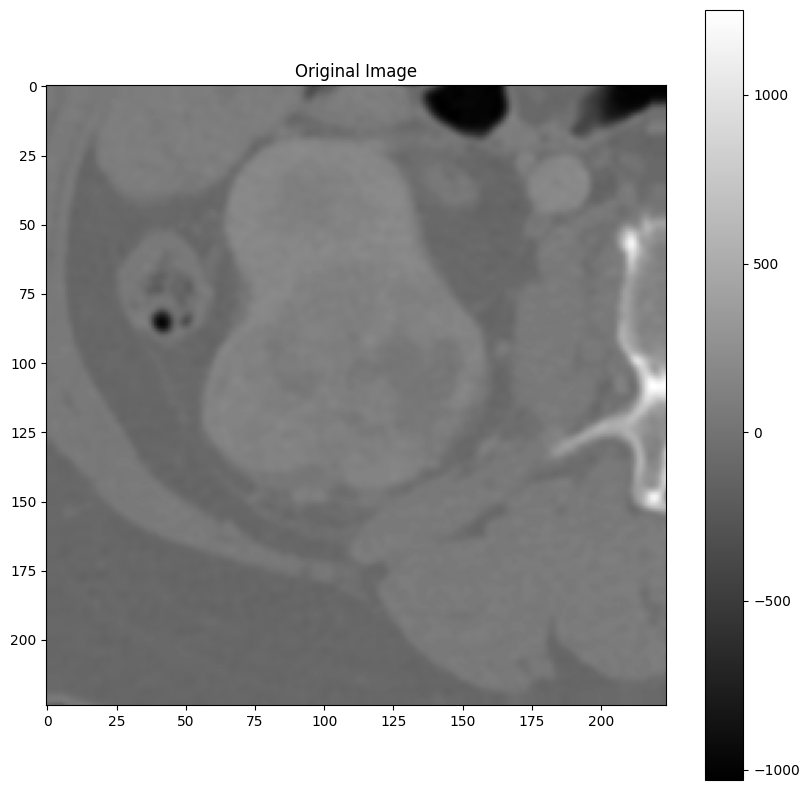

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

# 加载数据
image = np.load("./data/images/train_test/TJH0717.npy")
image = np.flip(image, axis=-1).copy()

rotate_angle_range=(-10, 10)
angle = np.random.uniform(*rotate_angle_range)
image = np.ascontiguousarray(image)
# 沿z轴旋转
for z in range(image.shape[0]):
    image[z] = rotate(image[z], angle, reshape=False, mode='nearest')

data = image[10, :, :]
# 方法1：基础显示
plt.figure(figsize=(10, 10))
plt.imshow(data, cmap='gray')
plt.colorbar()
plt.title('Original Image')
plt.axis('on')
plt.show()


In [5]:
import numpy as np
print(np.sum(data['class'].values == 1))
print(np.sum(data['class'].values == 0))
a = np.sum(data['class'].values == 1) / np.sum(data['class'].values == 0)
print(a)

71
613
0.11582381729200653


In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix

def calculate_kappa(y_true, y_pred):
    # 计算混淆矩阵
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # 计算观察准确率
    n = np.sum(conf_matrix)
    observed_accuracy = np.sum(np.diag(conf_matrix)) / n
    
    # 计算期望准确率
    row_sums = np.sum(conf_matrix, axis=1)
    col_sums = np.sum(conf_matrix, axis=0)
    expected_accuracy = np.sum((row_sums * col_sums) / n) / n
    
    # 计算kappa
    kappa = (observed_accuracy - expected_accuracy) / (1 - expected_accuracy)
    
    return kappa, observed_accuracy, expected_accuracy

def interpret_kappa(kappa):
    """解释Kappa值的含义"""
    if kappa < 0:
        return "性能差于随机分类"
    elif kappa < 0.2:
        return "轻度一致"
    elif kappa < 0.4:
        return "一般一致"
    elif kappa < 0.6:
        return "中度一致"
    elif kappa < 0.8:
        return "显著一致"
    else:
        return "几乎完全一致"
# 示例数据
y_true = [1, 0, 1, 1, 0, 0, 0, 1, 0, 0]  # 真实标签
y_pred = [1, 0, 0, 1, 0, 0, 1, 1, 0, 0]  # 预测标签

# 计算Kappa系数
kappa, observed_acc, expected_acc = calculate_kappa(y_true, y_pred)

print(f"Kappa系数: {kappa:.3f}")
print(f"观察准确率: {observed_acc:.3f}")
print(f"期望准确率: {expected_acc:.3f}")
print(f"解释: {interpret_kappa(kappa)}")

Kappa系数: 0.583
观察准确率: 0.800
期望准确率: 0.520
解释: 中度一致


In [7]:
def adjust_window(ct_image, window_width, window_level):
    """
    Adjusts the window level and window width of an image.
    """
    win_min = window_level - (window_width // 2)
    win_max = window_level + (window_width // 2)
    image_windowed = np.clip(ct_image, win_min, win_max)
    image_windowed = (image_windowed - win_min) / window_width
    image_windowed = np.float32(image_windowed)
    return image_windowed

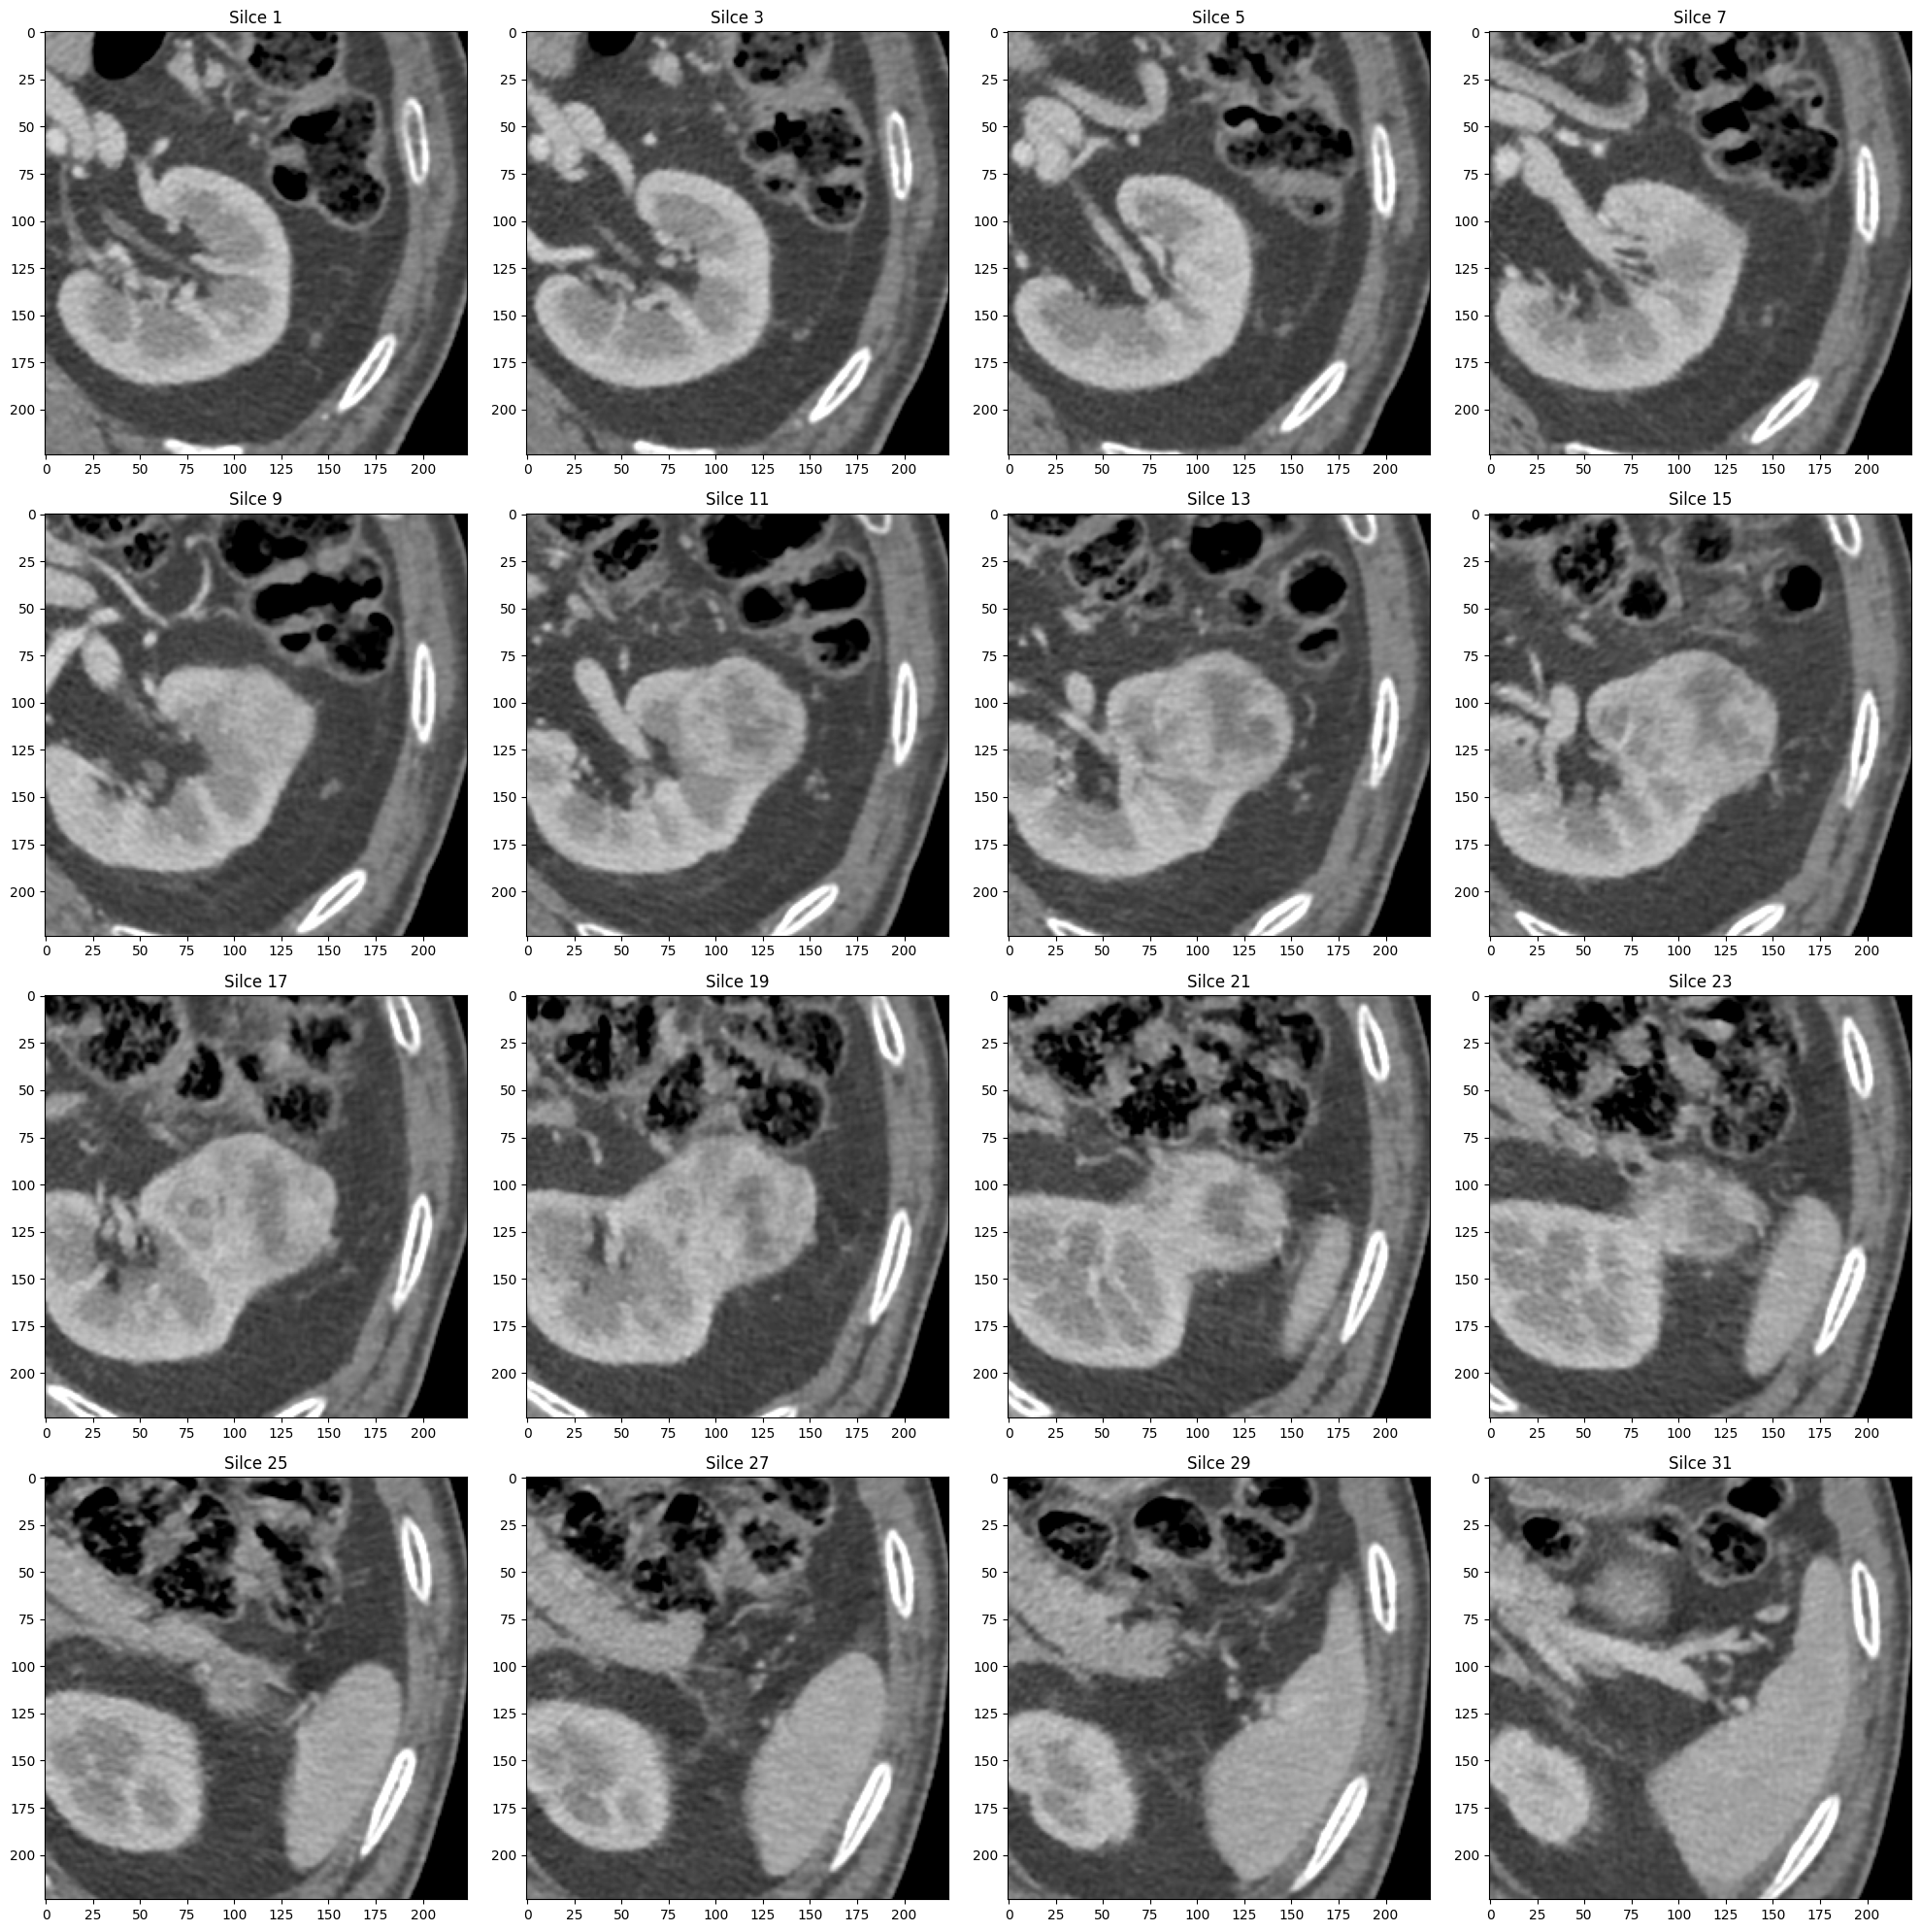

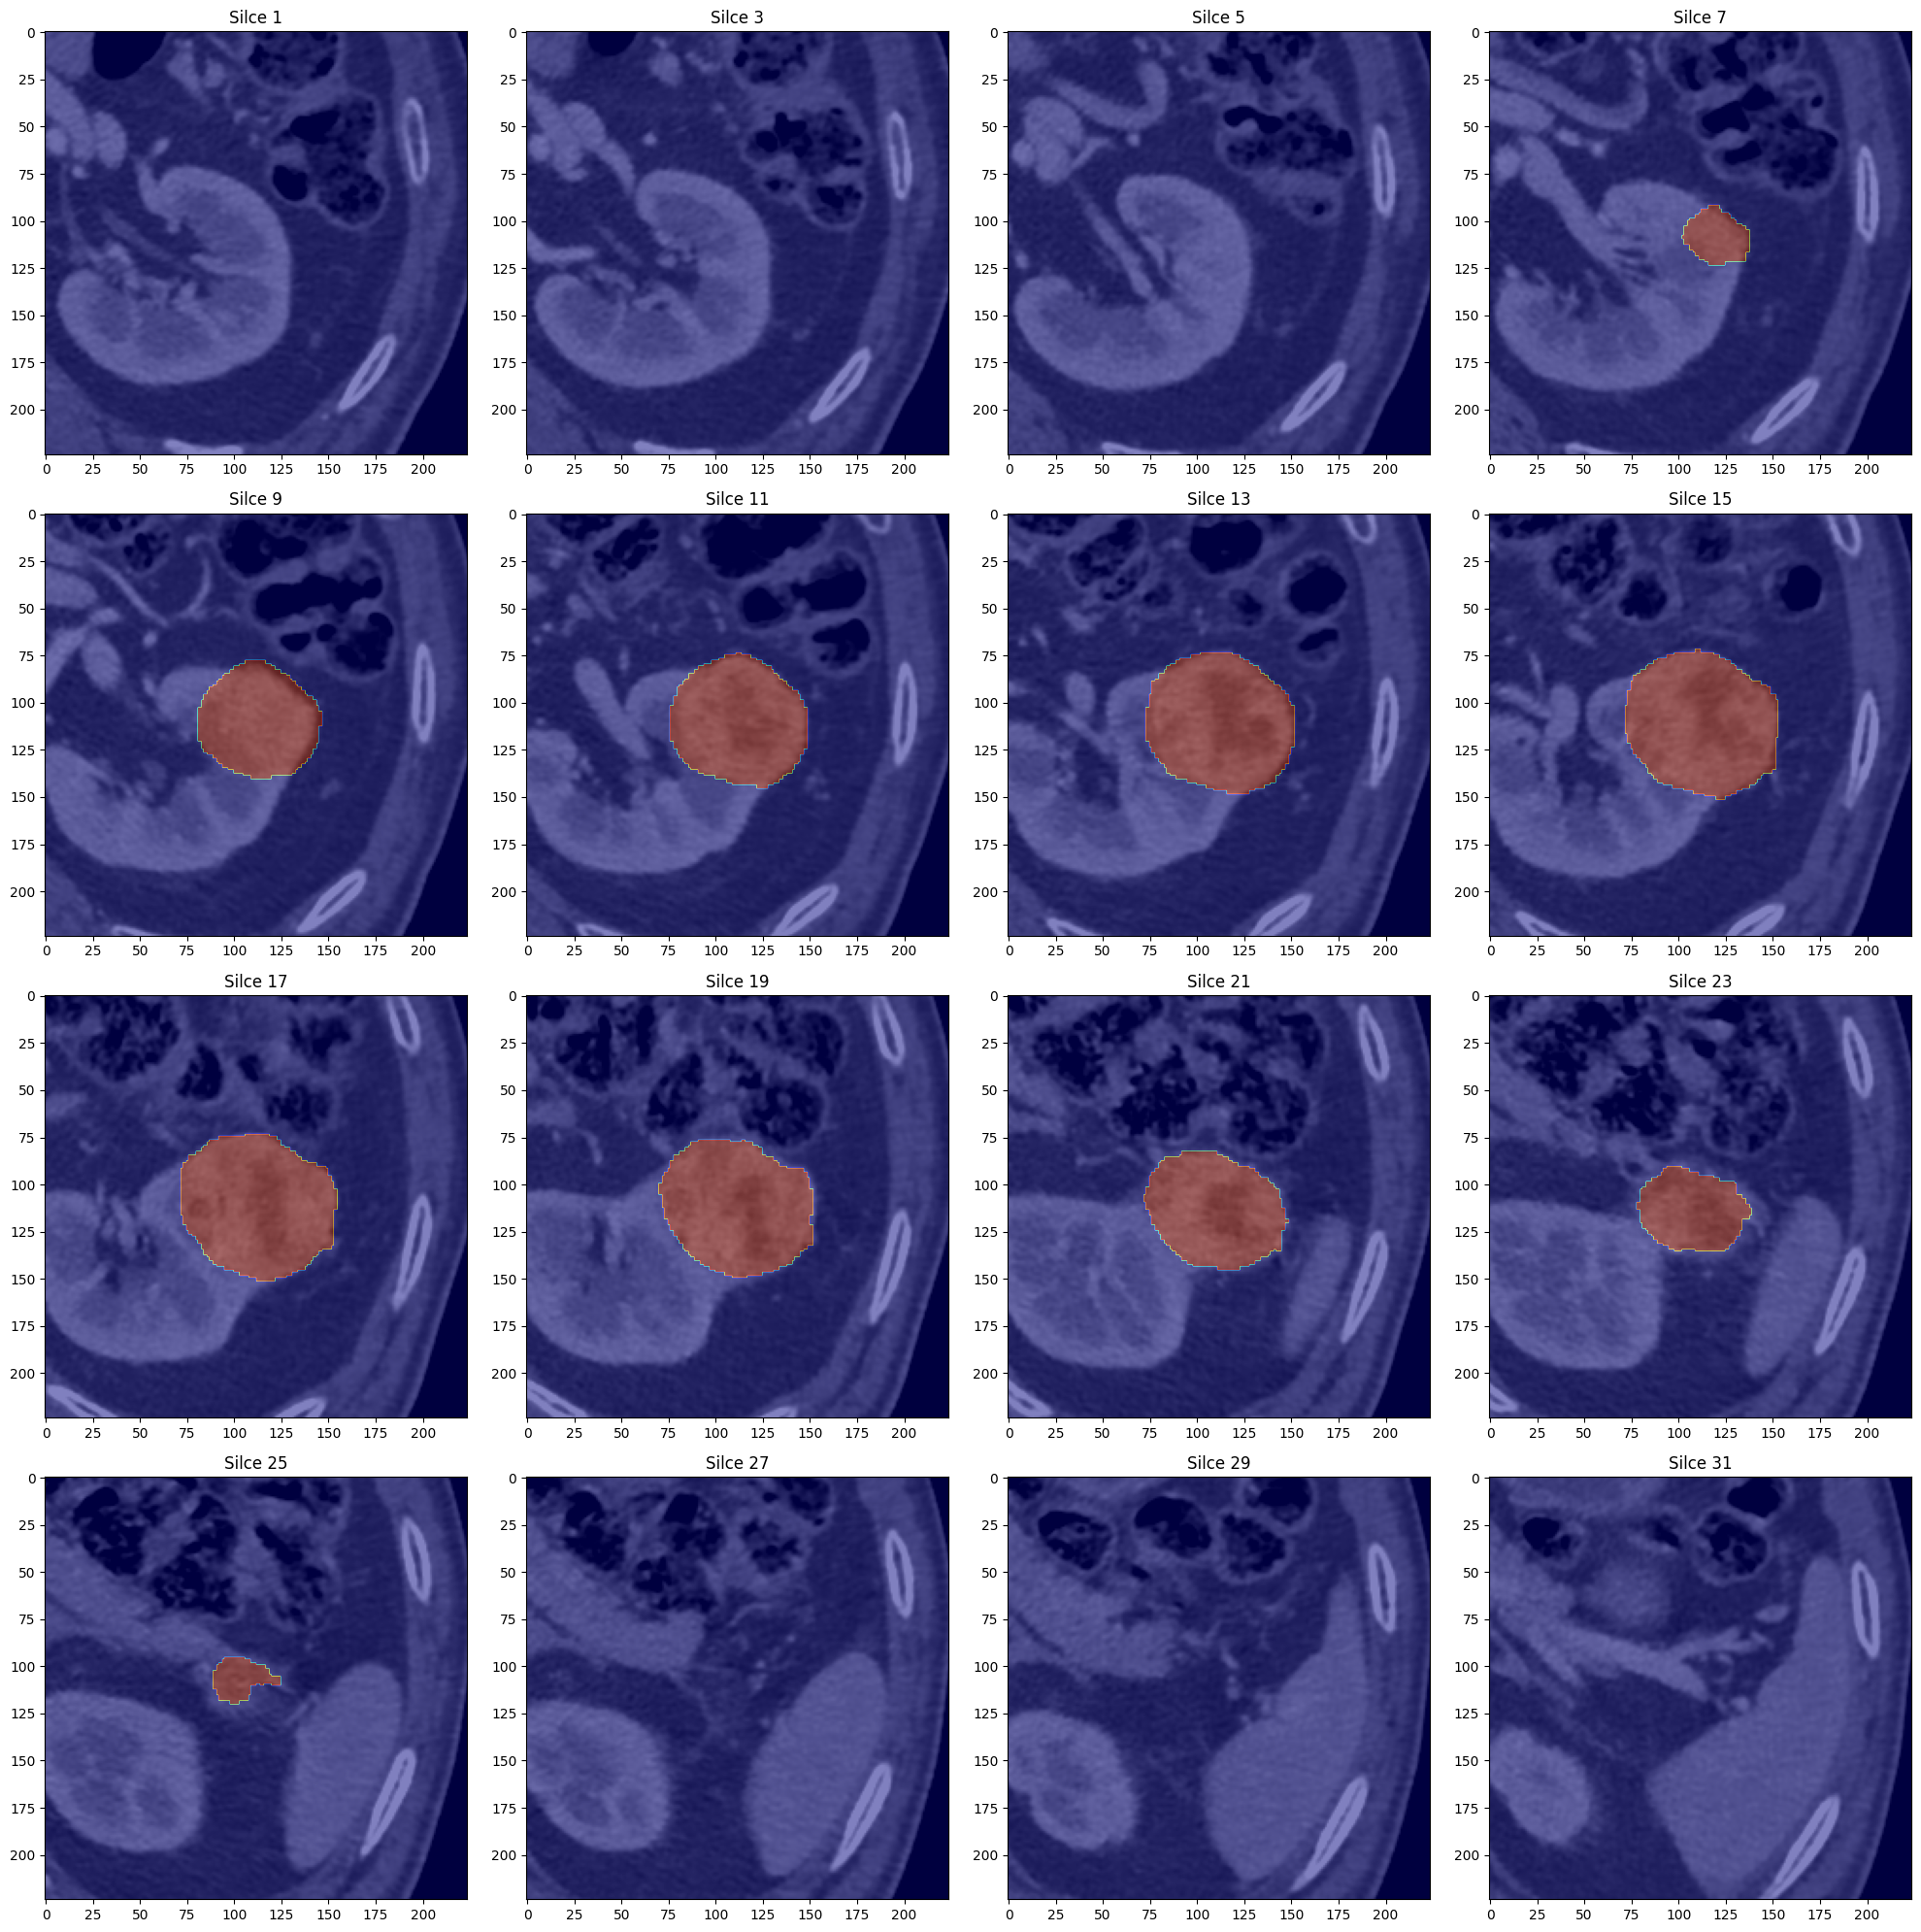

In [35]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load('./data/images/henan_test/HNCH002_A.npy')
label = np.load('./data/labels/henan_test/HNCH002_A.npy')
# 调窗
new_data = adjust_window(data, 600, 40)
# 可视化data,一共32张图找8张展示出来
plt.figure(figsize=(20, 20))
for i in range(16):
    # 创建子图并获取对应的 Axes 对象
    ax = plt.subplot(4, 4, i+1)
    
    # 显示原始图像
    ax.imshow(new_data[2*i, :, :], cmap='gray')
    
    # 可选：添加标题或其他注释
    ax.set_title(f'Silce {2*i+1}')
    
    # 去除坐标轴
    # ax.axis('off')

plt.tight_layout()
# 保存为pdf
plt.savefig('HNCH002_A_img.pdf')
plt.show()

label[label != 2] = 0
label[label == 2] = 1

plt.figure(figsize=(20, 20))
for i in range(16):
    # 创建子图并获取对应的 Axes 对象
    ax = plt.subplot(4, 4, i+1)
    
    # 显示原始图像
    ax.imshow(new_data[2*i, :, :], cmap='gray')
    
    # 覆盖掩码，设置透明度为30%
    # 假设 label 中的非零值表示掩码区域
    # 使用 'jet' 或其他适合的 colormap 来可视化掩码
    ax.imshow(label[2*i+1, :, :], cmap='jet', alpha=0.5)
    
    # 可选：添加标题或其他注释
    ax.set_title(f'Silce {2*i+1}')
    
    # 去除坐标轴
    # ax.axis('off')

plt.tight_layout()
# 保存为pdf
plt.savefig('HNCH002_A_mask.pdf')
plt.show()


In [3]:
import pandas as pd
df = pd.read_excel("./data/class.xlsx")
df_label = df["dataset"] + '&' + df["name"]
print(df_label)

0           tongji&RONG ZONG AN.npy
1                tongji&TJH0334.npy
2           tongji&YANG YUAN FU.npy
3                tongji&TJH0346.npy
4                tongji&TJH0811.npy
                   ...             
1403    xiangyang&TIAN MING ZHI.npy
1404         xiangyang&SHEN JIA.npy
1405     xiangyang&HU CHANG HUA.npy
1406        xiangyang&XIONG JIE.npy
1407    xiangyang&CAI JING JIAN.npy
Length: 1408, dtype: object
